In [3]:
# Importing all the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pandas.tools.plotting import autocorrelation_plot
%matplotlib inline
import time

In [4]:
# Reading dataset files
train_data = pd.read_csv("/data/yds_train2018.csv", parse_dates=[["Year", "Month"]])
expenses = pd.read_csv("/data/promotional_expense.csv", parse_dates = [["Year", "Month"]])
test_data = pd.read_csv("/data/yds_test2018.csv", parse_dates = [["Year", "Month"]])
sample_submission = pd.read_csv("/data/sample_submission.csv")
# holidays = pd.read_csv("/data/holidays.xlsx")

In [6]:
# Creating Replica of test data-set for answer
answer = pd.read_csv("/data/yds_test2018.csv")

# Exploring data

In [7]:
test_data.head()

,Year_Month,S_No,Product_ID,Country,Sales
0,2016-04-01,79073,1,Argentina,NaN
1,2016-05-01,79074,1,Argentina,NaN
2,2016-06-01,79075,1,Argentina,NaN
3,2016-07-01,79076,1,Argentina,NaN
4,2016-08-01,79077,1,Argentina,NaN


In [10]:
# The test data consists of sales for each merchant for week
train_data.head(10)

,Year_Month,S_No,Week,Merchant_ID,Product_ID,Country,Sales
0,2013-01-01,1,1,ar00001,1,Argentina,157500.0
1,2013-01-01,2,1,ar00003,1,Argentina,39375.0
2,2013-01-01,3,1,ar00004,1,Argentina,15750.0
3,2013-01-01,4,1,ar00007,1,Argentina,47250.0
4,2013-01-01,5,1,ar00008,1,Argentina,283500.0
5,2013-01-01,6,1,ar000011,1,Argentina,0.0
6,2013-01-01,7,1,ar000021,1,Argentina,1575.0
7,2013-01-01,8,1,ar000023,1,Argentina,47250.0
8,2013-01-01,9,1,ar000027,1,Argentina,0.0
9,2013-01-01,10,1,ar000038,1,Argentina,0.0


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79072 entries, 0 to 79071
Data columns (total 7 columns):
Year_Month     79072 non-null datetime64[ns]
S_No           79072 non-null int64
Week           79072 non-null int64
Merchant_ID    79072 non-null object
Product_ID     79072 non-null int64
Country        79072 non-null object
Sales          79072 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 4.2+ MB


In [15]:
train_data["Product_ID"].value_counts()

2    35723
1    23944
4    10343
3     5316
5     3746
Name: Product_ID, dtype: int64

In [20]:
test_data.isnull().sum()

Year_Month      0
S_No            0
Product_ID      0
Country         0
Sales         105
dtype: int64

In [10]:
expenses.head(10)

,Year_Month,Country,Product_Type,Expense_Price
0,2013-01-01,Argentina,1,14749.307
1,2013-01-01,Argentina,2,1329.374
2,2013-01-01,Belgium,2,249.590
3,2013-01-01,Columbia,1,1893.122
4,2013-01-01,Columbia,2,1436.726
5,2013-01-01,Denmark,2,43843.906
6,2013-02-01,Argentina,1,12187.566
7,2013-02-01,Argentina,2,1315.006
8,2013-02-01,Belgium,2,309.340
9,2013-02-01,Columbia,1,1977.945


# fill zero values in train

In [32]:
# Dropping week and Merchant ID
cols_to_drop = ["Merchant_ID", "Week"]
train_data.drop(cols_to_drop, axis=1, inplace=True)

Now we group the data by productID, Country, and Year_month(date parsing Year and Month) by sum of their sales

so we get total sales of a given product in a coutry every month. For eg. the total sales for Product_ID 1 in argentina in 2013/01 is 34346025.0 and so on

In [20]:
train_data_grouped = train_data.groupby(["Year_Month","Product_ID", "Country"], sort=False)["Sales"].sum()

In [21]:
train_data_grouped = train_data_grouped.reset_index(drop=False)
train_data_grouped.head()

,Year_Month,Product_ID,Country,Sales
0,2013-01-01,1,Argentina,34346025.0
1,2013-02-01,1,Argentina,32005575.0
2,2013-03-01,1,Argentina,32530050.0
3,2013-04-01,1,Argentina,35588700.0
4,2013-05-01,1,Argentina,38789100.0


In [23]:
# Now we concat the traing and testing dataset
data = pd.concat([train_data_grouped, test_data])

# Making Arima Model

My approach was to get sales for a productId in that country and the run arima model forecast
Most of the cases were showing positive correlation around a lag of 4-5 so setting p as 4 was appropriate

Fitting Argentina and ProductID 1
AutoCorrelation Plot


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  from ipykernel import kernelapp as app


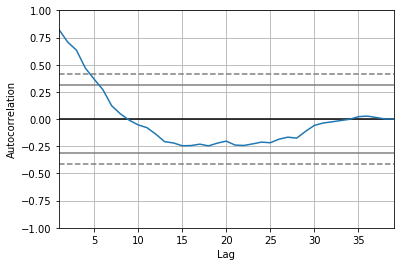

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fitting Argentina and ProductID 2
AutoCorrelation Plot


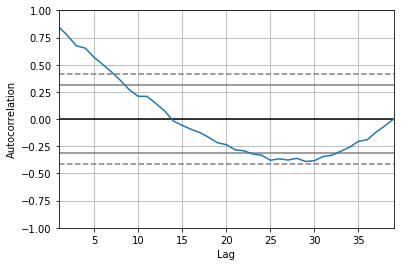

Fitting Argentina and ProductID 3
AutoCorrelation Plot


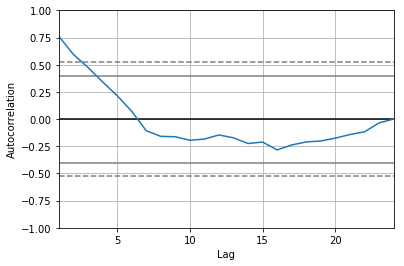

Fitting Argentina and ProductID 4
AutoCorrelation Plot


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/site-packages/pandas/plotting/_misc.py:553: RuntimeWarning: invalid value encountered in double_scalars
  c0 = np.sum((data - mean) ** 2) / float(n)
/usr/local/lib/python3.6/site-packages/pandas/plotting/_misc.py:562: RuntimeWarning: divide by zero encountered in double_scalars
  ax.axhline(y=z99 / np.sqrt(n), linestyle='--', color='grey')
/usr/local/lib/python3.6/site-packages/pandas/plotting/_misc.py:563: RuntimeWarning: divide by zero encountered in double_scalars
  ax.axhline(y=z95 / np.sqrt(n), color='grey')
/usr/local/lib/python3.6/site-packages/pandas/plotting/_misc.py:565: RuntimeWarning: divide by zero encountered in double_scalars
  ax.axhline(y=-z95 / np.sqrt(n), 

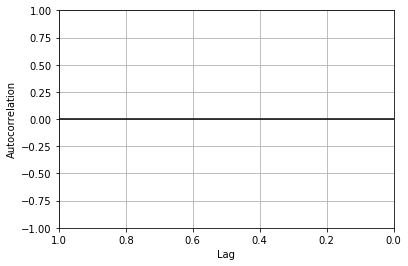

Fitting Argentina and ProductID 5
AutoCorrelation Plot


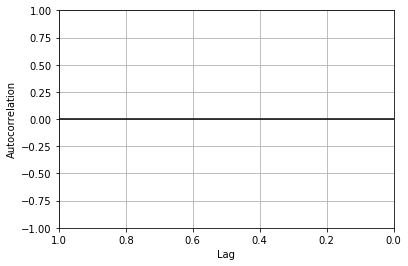

Fitting Belgium and ProductID 1
AutoCorrelation Plot


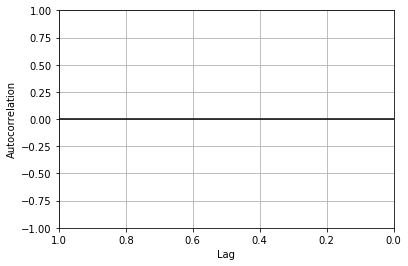

Fitting Belgium and ProductID 2
AutoCorrelation Plot


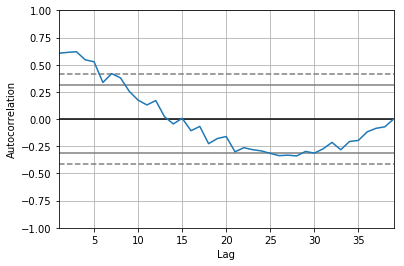

Fitting Belgium and ProductID 3
AutoCorrelation Plot


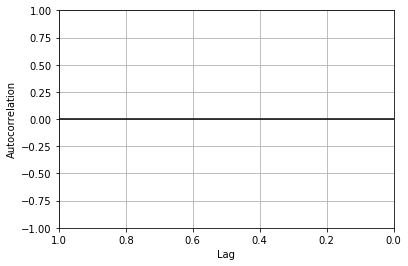

Fitting Belgium and ProductID 4
AutoCorrelation Plot


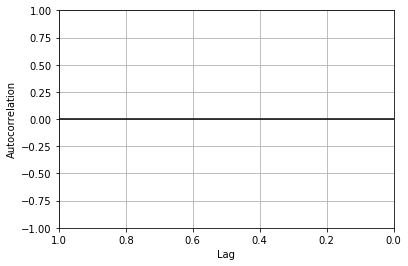

Fitting Belgium and ProductID 5
AutoCorrelation Plot


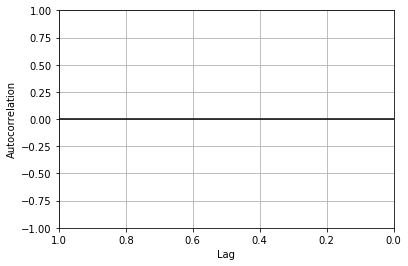

Fitting Columbia and ProductID 1
AutoCorrelation Plot


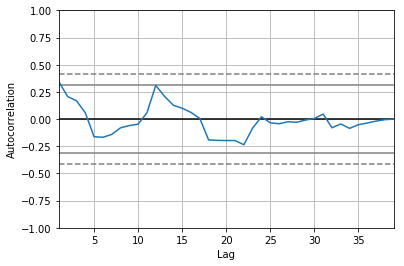

Fitting Columbia and ProductID 2
AutoCorrelation Plot


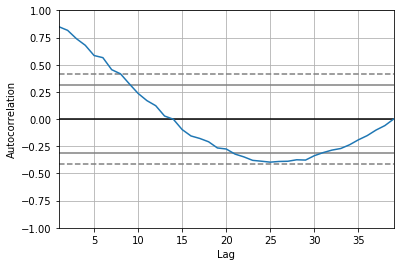

Fitting Columbia and ProductID 3
AutoCorrelation Plot


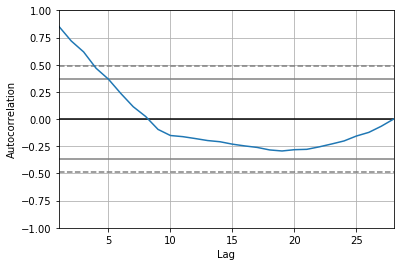

Fitting Columbia and ProductID 4
AutoCorrelation Plot


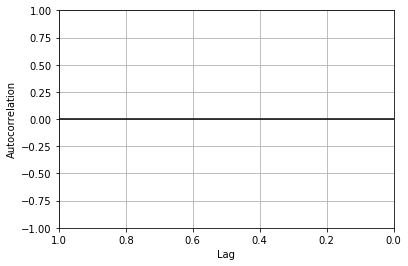

Fitting Columbia and ProductID 5
AutoCorrelation Plot


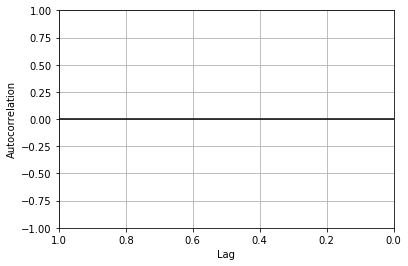

Fitting Denmark and ProductID 1
AutoCorrelation Plot


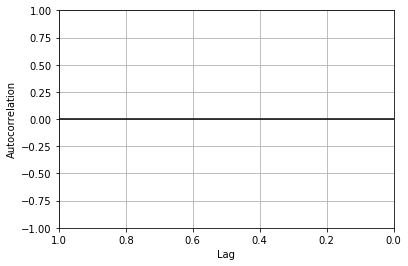

Fitting Denmark and ProductID 2
AutoCorrelation Plot


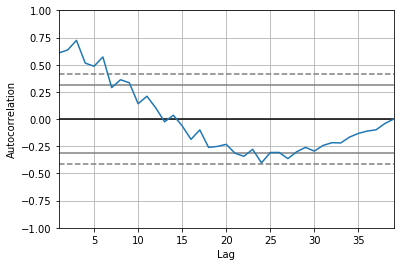

Fitting Denmark and ProductID 3
AutoCorrelation Plot


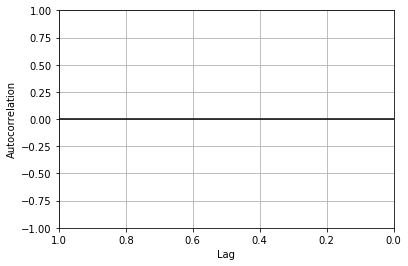

Fitting Denmark and ProductID 4
AutoCorrelation Plot


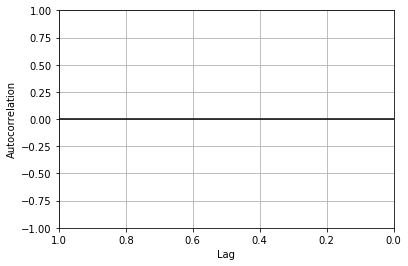

Fitting Denmark and ProductID 5
AutoCorrelation Plot


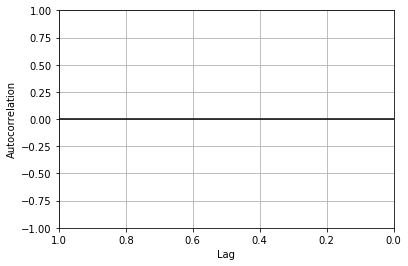

Fitting England and ProductID 1
AutoCorrelation Plot


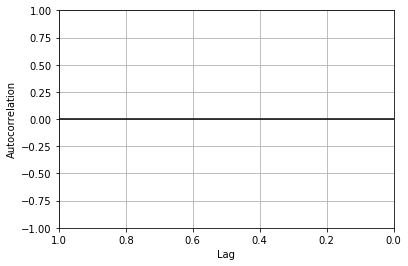

Fitting England and ProductID 2
AutoCorrelation Plot


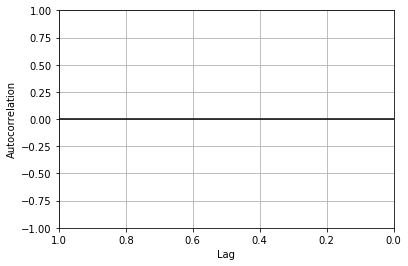

Fitting England and ProductID 3
AutoCorrelation Plot


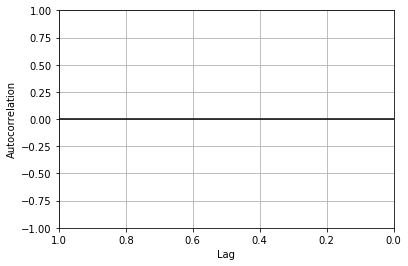

Fitting England and ProductID 4
AutoCorrelation Plot


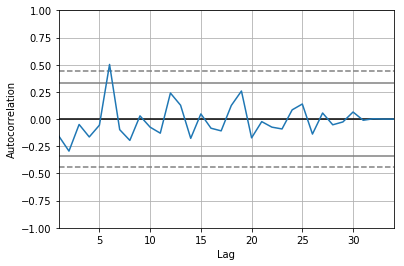

Fitting England and ProductID 5
AutoCorrelation Plot


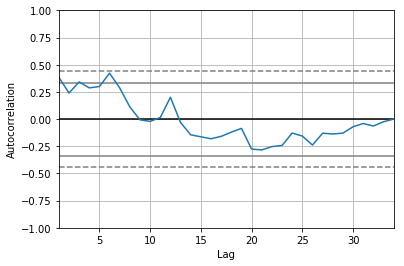

Fitting Finland and ProductID 1
AutoCorrelation Plot


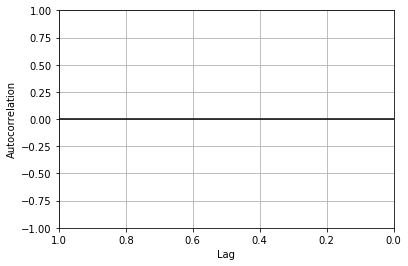

Fitting Finland and ProductID 2
AutoCorrelation Plot


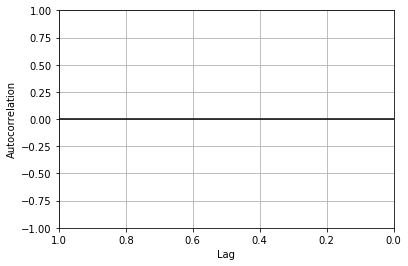

Fitting Finland and ProductID 3
AutoCorrelation Plot


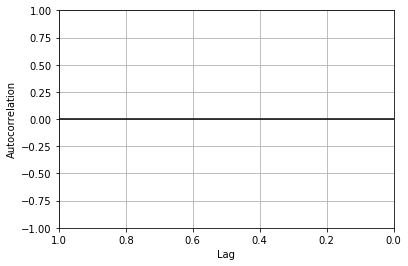

Fitting Finland and ProductID 4
AutoCorrelation Plot


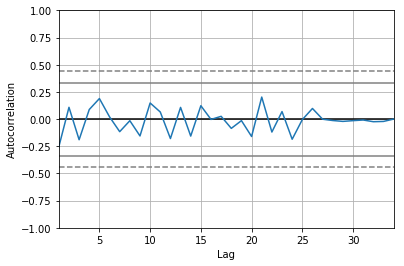

Fitting Finland and ProductID 5
AutoCorrelation Plot


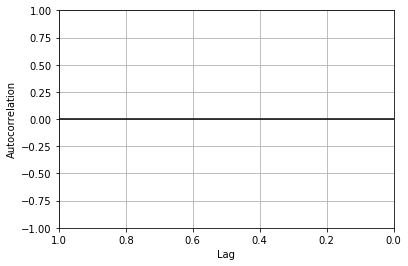

In [26]:
countries =["Argentina", "Belgium", "Columbia", "Denmark", "England", "Finland"]
main_preds = []
for country in countries:
    ctry_data = data[data["Country"] == country]
    for p_id in range(1,6):
        print("Fitting %s and ProductID %s" %(country, p_id))
        country_pid_data = ctry_data[ctry_data["Product_ID"] == p_id]
        country_pid_data_sales = country_pid_data[["S_No","Year_Month", "Sales"]]
        train = country_pid_data_sales[country_pid_data_sales["Sales"].isnull() != True]
#   Sales which are Nan are test_sets
        test = country_pid_data_sales[country_pid_data_sales["Sales"].isnull()]
        del test["Sales"]
        train = train.reset_index(drop=True)
        print("AutoCorrelation Plot")
        autocorrelation_plot(train["Sales"])
        plt.show()
        sale_vals = train["Sales"].values.tolist()
        sales = []
        for t in range(test.shape[0]):
            model = ARIMA(sale_vals, order=(4,1,0))
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
            yhat = output[0][0]
            sales.append(yhat)
            sale_vals.append(yhat)
        test["Sales"] = sales
        main_preds.append(test)

In [27]:
preds = pd.concat(main_preds)

In [28]:
del answer["Sales"]
answer = answer.merge(preds, how="left", on="S_No")
del answer["Year_Month"]

In [30]:
answer.head(10)

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,1.354288e+07
1,79074,2016,5,1,Argentina,1.201420e+07
2,79075,2016,6,1,Argentina,1.315515e+07
3,79076,2016,7,1,Argentina,1.168804e+07
4,79077,2016,8,1,Argentina,1.105778e+07
5,79078,2016,9,1,Argentina,1.114514e+07
6,79079,2016,10,1,Argentina,1.008224e+07
7,79080,2016,11,1,Argentina,9.676672e+06
8,79081,2016,12,1,Argentina,9.325511e+06
9,79082,2017,1,1,Argentina,8.543077e+06


In [48]:
sale_vals = train["Sales"].values.tolist()
sales = []
size = int(len(sale_vals) * 0.66)
tr, ts = sale_vals[0:size], sale_vals[size:len(sale_vals)]
print(test.shape[0])
for t in range(test.shape[0]):
    model = ARIMA(sale_vals, order=(5,1,0))
    model_fit = model.fit(disp=0)
#     print(model_fit.summary())
# plot residual errors
    output = model_fit.forecast()
    yhat = output[0][0]
    print("Predicted=",yhat)
#     print("Expected=",ts[t])
    sales.append(yhat)
    sale_vals.append(yhat)
# X = series.values
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()
# for t in range(len(test)):
# 	model = ARIMA(history, order=(5,1,0))
# 	model_fit = model.fit(disp=0)
# 	output = model_fit.forecast()
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	obs = test[t]
# 	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))

12
Predicted= 7608269.622782895
Predicted= 8004808.743217289
Predicted= 7729073.955332179
Predicted= 8023641.4197446965
Predicted= 8118348.287102343
Predicted= 8313284.744611622
Predicted= 8359660.725594472
Predicted= 8563159.53802829
Predicted= 8606756.265135268
Predicted= 8773858.316023417
Predicted= 8882784.599034011
Predicted= 9039488.739203136


In [31]:
# Main data for csv file
answer.to_csv("yds_submission2018-abhinav5.csv", index=False)

# Validate The Model
trying to find smape score for particular productID

In [62]:
def smape(preds, test):
#     labels = dtrain.get_label()
    num = np.absolute(np.array(preds) - np.array(test))
    den = (np.absolute(np.array(preds)) + np.absolute(np.array(test)))/2
    res = num/den
    smape_score = np.sum(res)/len(preds)
    return 'Smape', smape_score

In [59]:
country = "Finland"
pid = 4
country_data = data[data["Country"] == country]
country_pid_data = country_data[country_data["Product_ID"] == pid]

In [60]:
validate_data = country_pid_data[country_pid_data["Sales"].isnull() != True]

In [61]:
sale_vals = validate_data["Sales"].values.tolist()
sales = []
actual_sales = []
size = int(len(sale_vals) * 0.7)
tr, ts = sale_vals[0:size], sale_vals[size:len(sale_vals)]
print(len(ts))
for t in range(len(ts)):
    model = ARIMA(sale_vals, order=(5,1,0))
    model_fit = model.fit(disp=0)
#     print(model_fit.summary())
# plot residual errors
    output = model_fit.forecast()
    yhat = output[0][0]
    print("Predicted=",yhat)
    print("Expected=",ts[t])
    actual_sales.append(ts[t])
    sales.append(yhat)
    sale_vals.append(yhat)
print(smape(sales, actual_sales))

11
Predicted= 31153929.16625607
Expected= 30169071.139999997
Predicted= 31682098.387080997
Expected= 30706372.78000001
Predicted= 31072136.43090458
Expected= 50113926.02000002
Predicted= 31885453.46832215
Expected= 9044923.370000003
Predicted= 32841293.087118752
Expected= 31067217.980000008
Predicted= 33499149.444788605
Expected= 24446467.610000018
Predicted= 33679712.160399586
Expected= 31931776.300000012
Predicted= 33808127.29523317
Expected= 28287106.209999982
Predicted= 34289937.44768456
Expected= 28765114.990000017
Predicted= 35050965.146302015
Expected= 28817795.159999996
Predicted= 35619545.67372434
Expected= 31268810.859999985
('Smape', 0.2498318705433463)


The SMAPE Value is coming out to be 0.249 for finland in productID 4

my further aim is to grid search the model and also add expense parameter(try multivariate processing)